In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
df = pd.read_csv("data.csv", parse_dates=["date"], index_col = "date").asfreq("D")
print(df)

            orders  temperature  media_spend
date                                        
2020-05-02      54    18.270322          0.0
2020-05-03      63    19.882444          0.0
2020-05-04      56    16.878095          0.0
2020-05-05      65    21.878648          0.0
2020-05-06      64    21.112398          0.0
...            ...          ...          ...
2022-06-26      89    12.669216          0.0
2022-06-27      77     9.819516          0.0
2022-06-28      97    18.834372          0.0
2022-06-29      80          NaN          0.0
2022-06-30      79    11.982388          0.0

[790 rows x 3 columns]


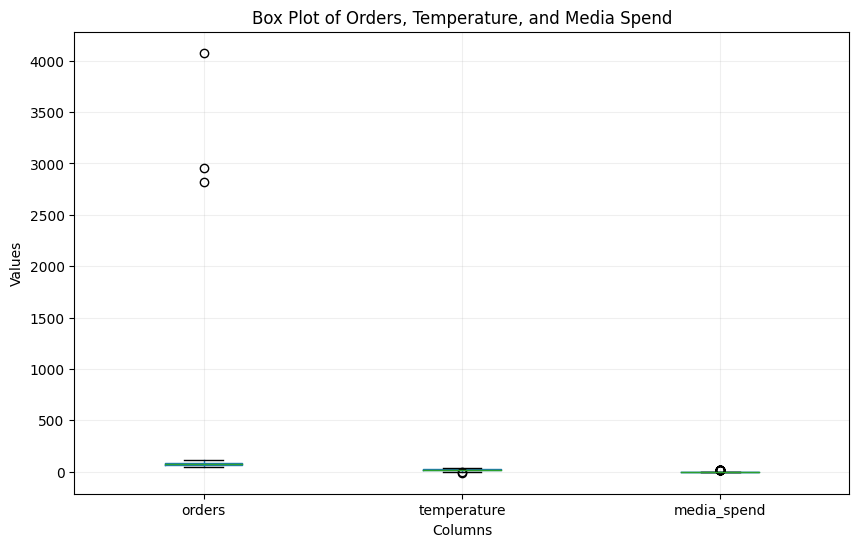

In [ ]:
import matplotlib.pyplot as plt

# "orders", "temperature" ve "media_spend" sütunlarını içeren bir alt DataFrame oluşturalım
sub_df = df[["orders", "temperature", "media_spend"]]

# Boxplot'u çizdirme
plt.figure(figsize=(10, 6))
sub_df.boxplot()
plt.grid(which='both', alpha=0.2)

plt.title("Box Plot of Orders, Temperature, and Media Spend")
plt.ylabel("Values")
plt.xlabel("Columns")
plt.show()







In [ ]:
abnormal_values_dates = []

for month in range(1, 13):  # 1'den 12'ye kadar ay değerleri

    # Ayına göre değerleri gruplayalım
    df_month = df[df.index.month == month]

    # Q1, Q3 ve interquartile range değerlerini hesaplayalım
    q1 = df_month["orders"].quantile(0.25) #Alt veri çerçevesinin "orders" sütununun %25 quantile (çeyreklik) değeri hesaplanır.
    q3 = df_month["orders"].quantile(0.75) #Alt veri çerçevesinin "orders" sütununun %75 quantile (çeyreklik) değeri hesaplanır.
    iqr = q3 - q1 #Interquartile Range (IQR) hesaplanır. Bu, verilerin merkezi yayılmasını temsil eder.

    # Anomalileri bulalım
    abnormal_dates = df_month[(df_month["orders"] < q1 - 1.5 * iqr) \
                         | (df_month["orders"] > q3 + 1.5 * iqr)].index #Alt veri çerçevesindeki "orders" sütununda, IQR'ın alt veya üst sınırlarının dışında kalan tarihler tespit edilir

    # Anomalileri listeye ekleyelim
    if not abnormal_dates.empty:
        abnormal_values_dates.extend(list(abnormal_dates))

        # Abnormal dates'i tarih sırasına göre sıralayalım
abnormal_values_dates.sort()

    # Abnormal dates'i ekrana bastıralım
print("Abnormal Dates:")
print("\n".join(map(str, abnormal_values_dates)))

Abnormal Dates:
2020-06-03 00:00:00
2020-06-05 00:00:00
2020-12-03 00:00:00
2020-12-27 00:00:00
2021-01-02 00:00:00
2021-01-14 00:00:00
2021-03-21 00:00:00
2021-03-22 00:00:00
2021-03-26 00:00:00
2021-08-29 00:00:00
2022-01-20 00:00:00
2022-02-16 00:00:00
2022-04-05 00:00:00
2022-04-07 00:00:00


Abnormal Dates:
2020-05-26 00:00:00
2020-05-27 00:00:00
2020-06-03 00:00:00
2020-07-12 00:00:00
2020-08-03 00:00:00
2020-08-05 00:00:00
2020-08-18 00:00:00
2020-09-01 00:00:00
2020-09-09 00:00:00
2020-09-15 00:00:00
2020-11-01 00:00:00
2020-11-07 00:00:00
2020-12-01 00:00:00
2020-12-03 00:00:00
2020-12-27 00:00:00
2021-01-01 00:00:00
2021-01-02 00:00:00
2021-01-14 00:00:00
2021-02-13 00:00:00
2021-03-01 00:00:00
2021-03-03 00:00:00
2021-03-22 00:00:00
2021-04-30 00:00:00
2021-05-01 00:00:00
2021-05-05 00:00:00
2021-05-08 00:00:00
2021-06-04 00:00:00
2021-06-19 00:00:00
2021-06-20 00:00:00
2021-06-21 00:00:00
2021-06-22 00:00:00
2021-07-01 00:00:00
2021-07-03 00:00:00
2021-07-15 00:00:00
2021-07-23 00:00:00
2021-07-30 00:00:00
2021-08-01 00:00:00
2021-08-12 00:00:00
2021-08-29 00:00:00
2021-09-24 00:00:00
2021-10-27 00:00:00
2021-11-04 00:00:00
2021-11-05 00:00:00
2021-11-07 00:00:00
2021-11-13 00:00:00
2021-11-29 00:00:00
2021-12-02 00:00:00
2021-12-25 00:00:00
2022-01-02 00:00:00
2022

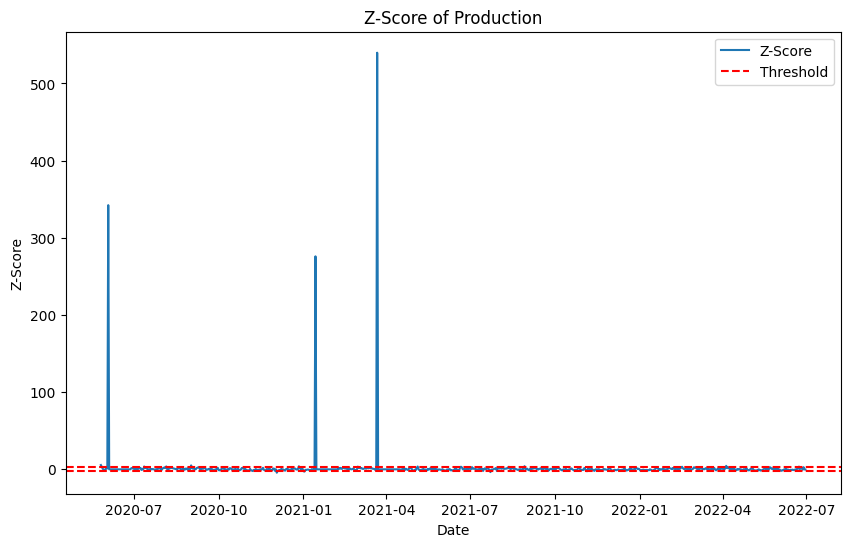

In [ ]:
# Define the z-score function
# Z-skoru ile bir verinin ortalama değerinden ve standart sapmasından ne kadar uzak olduğunu ölçüyoruz.
def zscore(x, window):
    r = x.rolling(window=window)
    m = r.mean().shift(1)
    s = r.std(ddof=0).shift(1)
    z = (x - m) / s
    return z

# Calculate zscore with a rolling window and get abnormal values
window_size = 24
df_zscore = zscore(df["orders"], window_size)

# Apply a threshold for the z-score
threshold = 2
abnormal_values_dates = df_zscore[abs(df_zscore) > threshold].index

# Abnormal dates'i altalta yazdıralım
#Anormal değerler, bu ortalama değer ve standart sapmanın belirli bir çarpanı kadar uzaklıkta bulunan değerler
print("Abnormal Dates:")
print("\n".join(map(str, abnormal_values_dates)))


# Plot z-scores
plt.figure(figsize=(10, 6))
plt.plot(df.index, df_zscore, label="Z-Score")
plt.axhline(y=3, color='r', linestyle='--', label="Threshold")
plt.axhline(y=-3, color='r', linestyle='--')
plt.legend()
plt.title("Z-Score of Production")
plt.xlabel("Date")
plt.ylabel("Z-Score")
plt.show()




In [ ]:
import numpy as np

# Set anomalies to NaN  for the "orders" column
df.loc[abnormal_values_dates, 'orders'] = np.nan # anormal değerleri tespit ettiğiniz tarihlerdeki verileri NaN (boş) olarak ayarlar.

# Print the modified DataFrame
print(df)

            orders  temperature  media_spend
date                                        
2020-05-02    54.0    18.270322          0.0
2020-05-03    63.0    19.882444          0.0
2020-05-04    56.0    16.878095          0.0
2020-05-05    65.0    21.878648          0.0
2020-05-06    64.0    21.112398          0.0
...            ...          ...          ...
2022-06-26    89.0    12.669216          0.0
2022-06-27    77.0     9.819516          0.0
2022-06-28     NaN    18.834372          0.0
2022-06-29    80.0          NaN          0.0
2022-06-30    79.0    11.982388          0.0

[790 rows x 3 columns]


In [ ]:
# Calculate the average orders per month
# her ayın verilerini işlemek için veri çerçevesini filtreler. sadece belirli bir ayın verilerini seçer.
#Önceden hesaplanan aylık ortalama sipariş değeri ile boş olan değerler doldurulur.
monthly_avg = df.groupby(df.index.month).mean()

# Impute these values
for month in monthly_avg.index:
    df.loc[df.index.month == month, 'orders'] = \
        df.loc[df.index.month == month, 'orders'].fillna(
            monthly_avg.loc[month, 'orders'])

print(df)

               orders  temperature  media_spend
date                                           
2020-05-02  54.000000    18.270322          0.0
2020-05-03  63.000000    19.882444          0.0
2020-05-04  56.000000    16.878095          0.0
2020-05-05  65.000000    21.878648          0.0
2020-05-06  64.000000    21.112398          0.0
...               ...          ...          ...
2022-06-26  89.000000    12.669216          0.0
2022-06-27  77.000000     9.819516          0.0
2022-06-28  70.696203    18.834372          0.0
2022-06-29  80.000000          NaN          0.0
2022-06-30  79.000000    11.982388          0.0

[790 rows x 3 columns]


In [ ]:
df = df.interpolate()

print(df)

               orders  temperature  media_spend
date                                           
2020-05-02  54.000000    18.270322          0.0
2020-05-03  63.000000    19.882444          0.0
2020-05-04  56.000000    16.878095          0.0
2020-05-05  65.000000    21.878648          0.0
2020-05-06  64.000000    21.112398          0.0
...               ...          ...          ...
2022-06-26  89.000000    12.669216          0.0
2022-06-27  77.000000     9.819516          0.0
2022-06-28  70.696203    18.834372          0.0
2022-06-29  80.000000    15.408380          0.0
2022-06-30  79.000000    11.982388          0.0

[790 rows x 3 columns]


In [ ]:
#df["temperature"] = df["temperature"].interpolate()
#print(df.isnull().sum())
#y = df["temperature"]
#print(df)
adf_test = adfuller(df["temperature"])
p_value = adf_test[1]
print(p_value)

0.11821973694468002


In [ ]:
adf_test = adfuller(df["orders"])
p_value = adf_test[1]
print(p_value)

0.19521402835980672


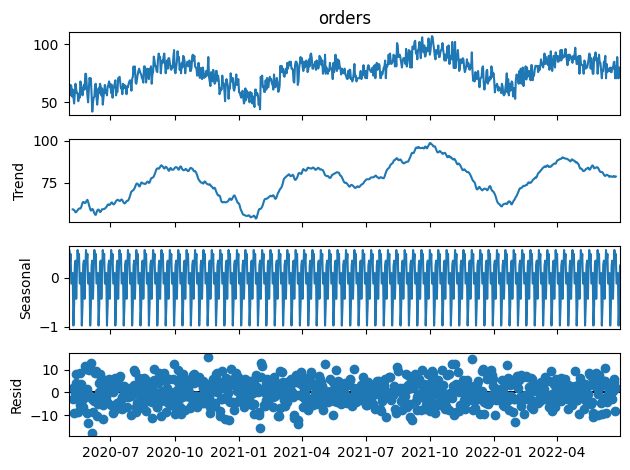

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

dec_df = seasonal_decompose(df["orders"], model="add", period=12)
fig = dec_df.plot()

In [ ]:
df_diff = df.diff().diff(7).dropna() #Mevsimsellik 12 ay ile yinelendigi icin 12 aylik bir fark aldik.
df_diff = df["orders"].diff().dropna()
print(df_diff)
print(adf_test[1])

date
2020-05-03     9.000000
2020-05-04    -7.000000
2020-05-05     9.000000
2020-05-06    -1.000000
2020-05-07    -9.000000
                ...    
2022-06-26    18.303797
2022-06-27   -12.000000
2022-06-28    -6.303797
2022-06-29     9.303797
2022-06-30    -1.000000
Freq: D, Name: orders, Length: 789, dtype: float64
0.19521402835980672


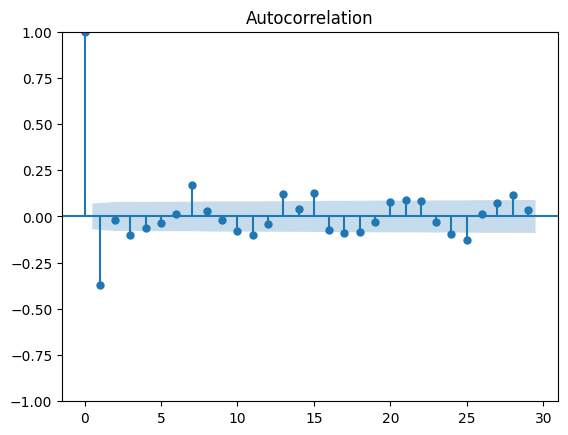

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig1 = plot_acf(df_diff)

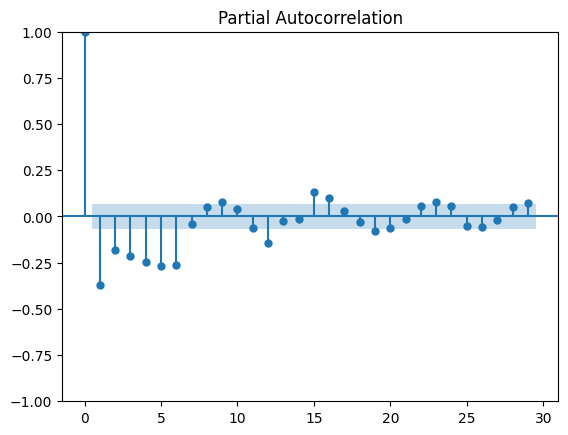

In [ ]:
fig2 = plot_pacf(df_diff)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, q = 0, 0
diff = 1
s_order = (0, 1, 1, 7)
y = df["orders"]
exog_vars = df[["temperature", "media_spend"]]  # exogenous değişkenler

model = SARIMAX(y, exog=exog_vars, order=(p, diff, q), seasonal_order=s_order, trend="n")
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                              orders   No. Observations:                  790
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 7)   Log Likelihood               -2448.461
Date:                             Wed, 16 Aug 2023   AIC                           4904.923
Time:                                     08:00:50   BIC                           4923.570
Sample:                                 05-02-2020   HQIC                          4912.094
                                      - 06-30-2022                                         
Covariance Type:                               opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     0.7790      0.039     19.997      0.000       0.703       0.855
media_spend    -0.0852  

<Axes: xlabel='date'>

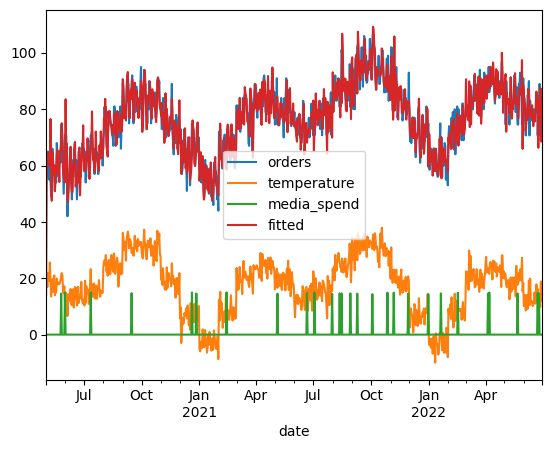

In [ ]:
fitted = model_fit.predict()
resids = model_fit.resid
new_df = df.copy()
new_df["fitted"] = fitted
new_df.plot()

In [ ]:
import numpy as np
mae = np.mean(np.abs(resids.values))
mse = np.mean(np.square(resids.values))
rmse = np.sqrt(np.mean(np.square(resids.values)))
print(mae)
print(mse)
print(rmse)

4.272607925862871
33.01019028708993
5.745449528721832


Grid Search


In [ ]:
import math


In [ ]:
test_size = math.ceil(len(df) * 0.10)
print(test_size)

79


In [ ]:
train, test = df[:-test_size], df[-test_size:]
y = train["orders"]

In [ ]:
res = []
for p in range(0, 2):
    for q in range(0, 2):
        for P in range(0, 2):
            for Q in range(0, 2):
                model = SARIMAX(
                    y, order=(p, 1, q), seasonal_order=(P, 1, Q, 7)
                ).fit()
                aic = model.aic
                bic = model.bic
                res.append((p, q, P, Q, aic, bic))
        res_df = pd.DataFrame(res, columns=["p", "q", "P", "Q", "AIC", "BIC"])
print(res_df.sort_values("AIC"))
print(res_df.sort_values("BIC"))

    p  q  P  Q          AIC          BIC
5   0  1  0  1  4354.154686  4367.820757
7   0  1  1  1  4355.223730  4373.445158
13  1  1  0  1  4356.113455  4374.334882
15  1  1  1  1  4357.222327  4379.999112
9   1  0  0  1  4475.807573  4489.473644
11  1  0  1  1  4477.148051  4495.369479
6   0  1  1  0  4608.485749  4622.151820
14  1  1  1  0  4609.302286  4627.523714
3   0  0  1  1  4654.767361  4668.433431
1   0  0  0  1  4655.273971  4664.384685
12  1  1  0  0  4730.488168  4744.154238
10  1  0  1  0  4740.741542  4754.407612
4   0  1  0  0  4753.811112  4762.921826
8   1  0  0  0  4895.138306  4904.249020
2   0  0  1  0  4931.317578  4940.428292
0   0  0  0  0  5061.903293  5066.458650
    p  q  P  Q          AIC          BIC
5   0  1  0  1  4354.154686  4367.820757
7   0  1  1  1  4355.223730  4373.445158
13  1  1  0  1  4356.113455  4374.334882
15  1  1  1  1  4357.222327  4379.999112
9   1  0  0  1  4475.807573  4489.473644
11  1  0  1  1  4477.148051  4495.369479
6   0  1  1  0  

In [ ]:
p,  q,  P,  Q = 0,  1,  1,  1



model = SARIMAX(y, order=(p, 1, q), seasonal_order=(P, 1, Q, 7)).fit()
print(model.summary())


<ipython-input-23-9d102ab7d916>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pred"] = forecasts


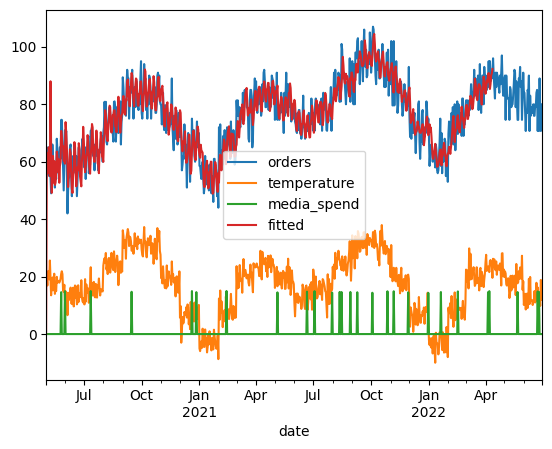

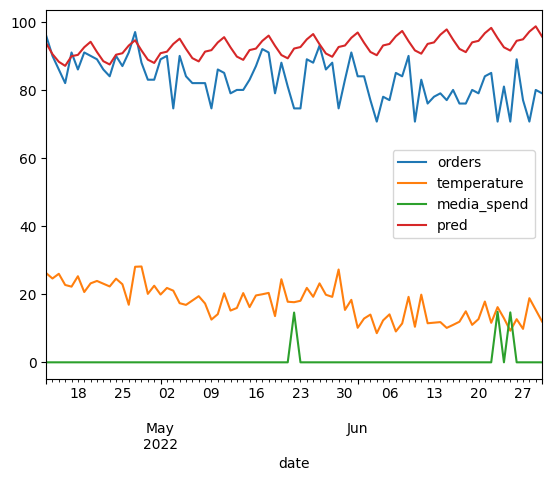

In [ ]:
fitted = model.predict()
# resid = model.resid
forecasts = model.forecast(steps=test_size)
df["fitted"] = fitted
test["pred"] = forecasts
df.plot()
test.plot()
plt.show()

<Axes: xlabel='date'>

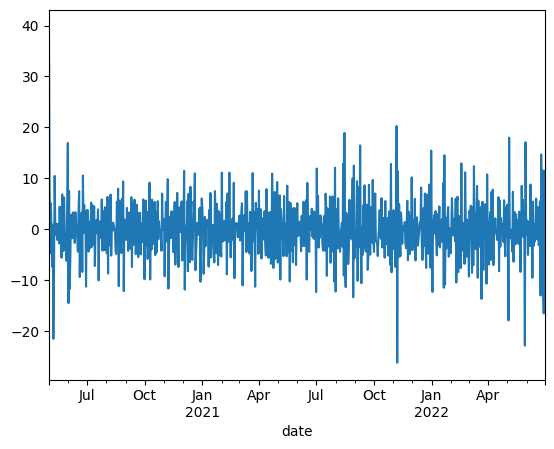

In [ ]:
resids.plot()

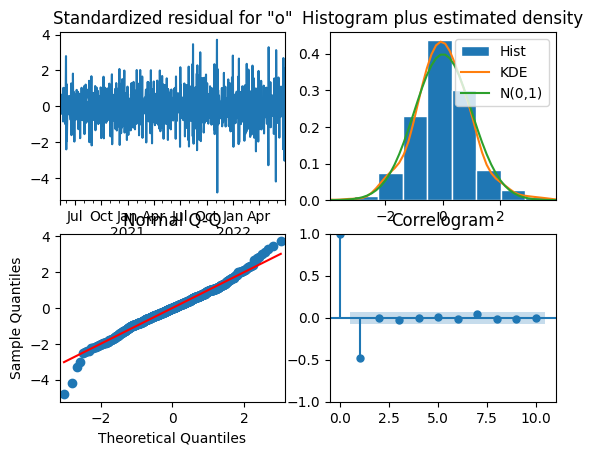

In [ ]:
diags = model_fit.plot_diagnostics()

In [ ]:
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                              orders   No. Observations:                  790
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 7)   Log Likelihood               -2448.461
Date:                             Wed, 16 Aug 2023   AIC                           4904.923
Time:                                     08:01:17   BIC                           4923.570
Sample:                                 05-02-2020   HQIC                          4912.094
                                      - 06-30-2022                                         
Covariance Type:                               opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     0.7790      0.039     19.997      0.000       0.703       0.855
media_spend    -0.0852  